In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [4]:
file_path = "C:\\Users\\Krishna\\Downloads\\The Titanic dataset.csv"

In [5]:
df = pd.read_csv(file_path, skiprows=1)

In [6]:
df.columns = ["sn","pclass","survived","name","gender","age","family","fare","embarked","date"]

In [7]:
print("Shape:", df.shape)
df.head()

Shape: (1301, 10)


,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2.0,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2.0,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2.0,20.25,S,04-Jan-90


In [8]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")

In [9]:
df["fare"] = pd.to_numeric(df["fare"], errors="coerce")

In [10]:
df = df.drop_duplicates()

In [11]:
print("\nMissing values:")
print(df.isna().sum())


Missing values:
sn            0
pclass        0
survived      0
name          0
gender        1
age         258
family        2
fare          3
embarked      5
date          0
dtype: int64


In [12]:
print("\nInfo:")
print(df.info())
print("\nDescribe numeric columns:")
print(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1300 non-null   int64  
 1   pclass    1300 non-null   int64  
 2   survived  1300 non-null   int64  
 3   name      1300 non-null   object 
 4   gender    1299 non-null   object 
 5   age       1042 non-null   float64
 6   family    1298 non-null   float64
 7   fare      1297 non-null   float64
 8   embarked  1295 non-null   object 
 9   date      1300 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 111.7+ KB
None

Describe numeric columns:
                sn       pclass     survived          age       family  \
count  1300.000000  1300.000000  1300.000000  1042.000000  1298.000000   
mean    650.500000     2.289231     0.384615    29.967294     0.890601   
std     375.421985     0.838475     0.486691    14.366911     1.588428   
min       1.000000     1.000000

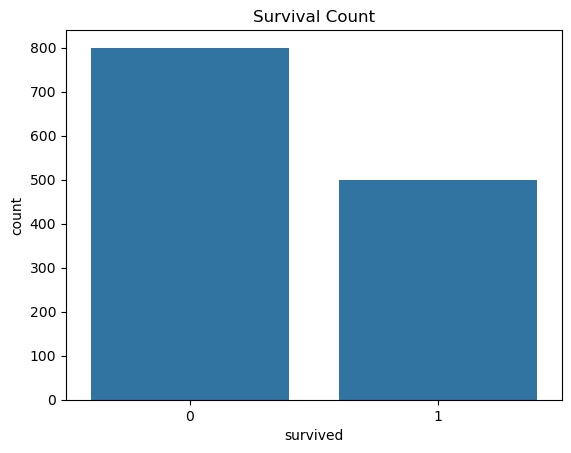

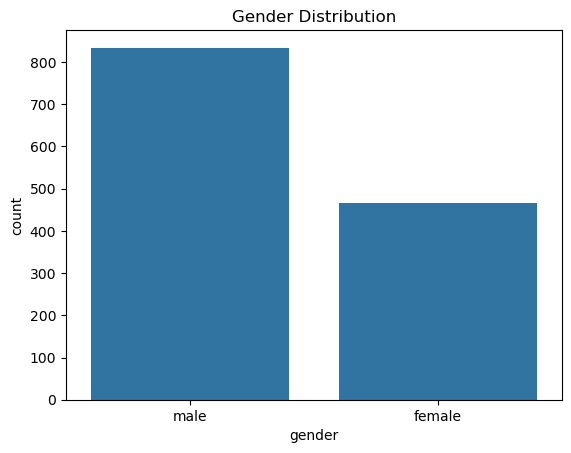

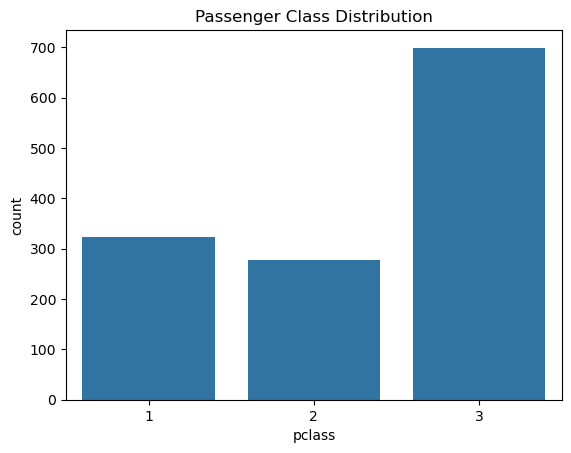

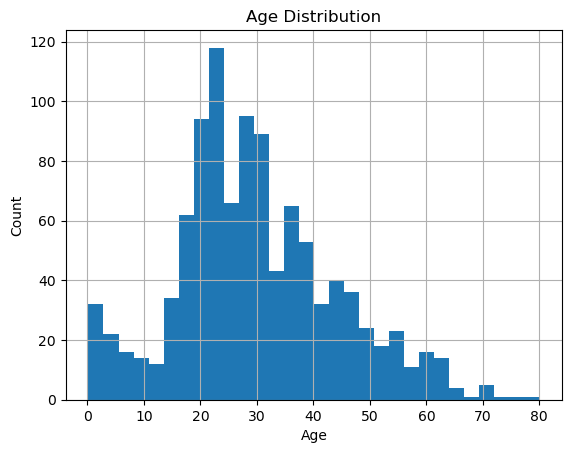

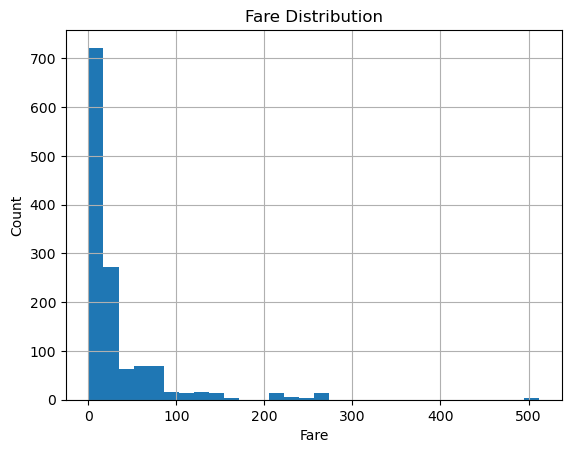

In [13]:
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.show()
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.show()
sns.countplot(x="pclass", data=df)
plt.title("Passenger Class Distribution")
plt.show()
df["age"].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
df["fare"].hist(bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

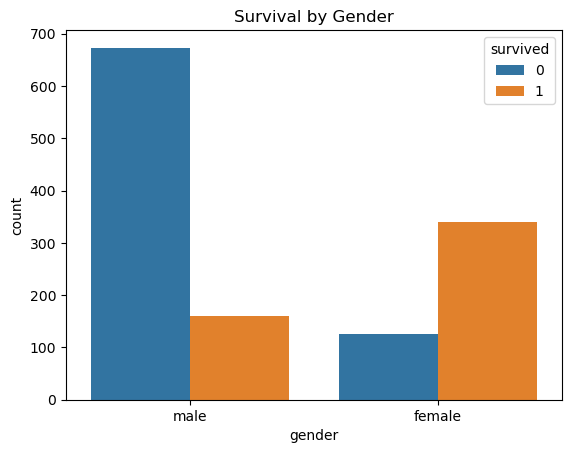

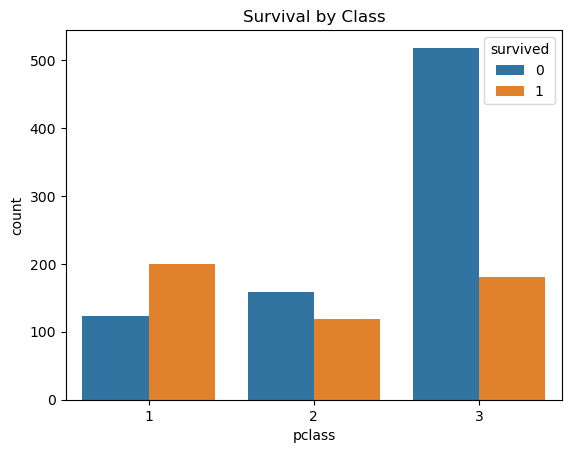

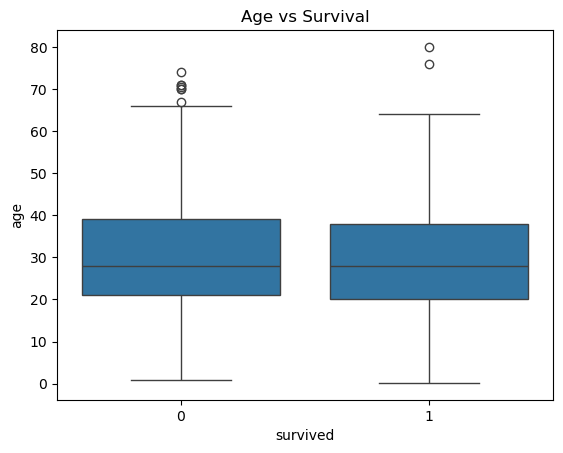

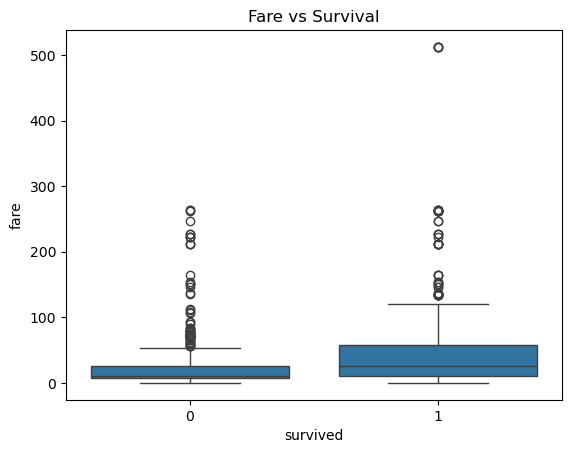

In [14]:
# Survival by Gender
sns.countplot(x="gender", hue="survived", data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
sns.countplot(x="pclass", hue="survived", data=df)
plt.title("Survival by Class")
plt.show()

# Age vs Survival (boxplot)
sns.boxplot(x="survived", y="age", data=df)
plt.title("Age vs Survival")
plt.show()

# Fare vs Survival (boxplot)
sns.boxplot(x="survived", y="fare", data=df)
plt.title("Fare vs Survival")
plt.show()

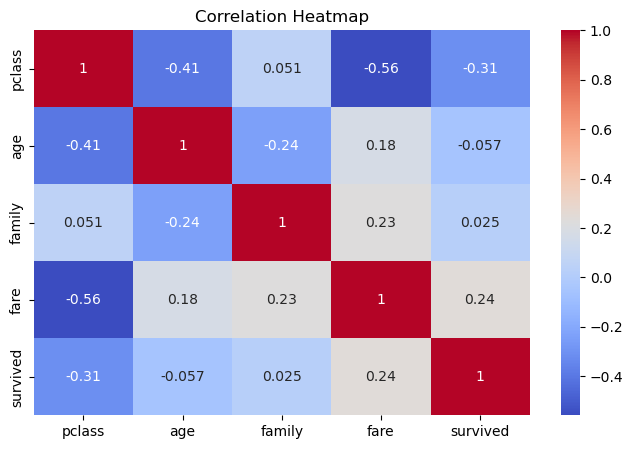

In [15]:
numeric_cols = ["pclass","age","family","fare","survived"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

age skewness: 0.414


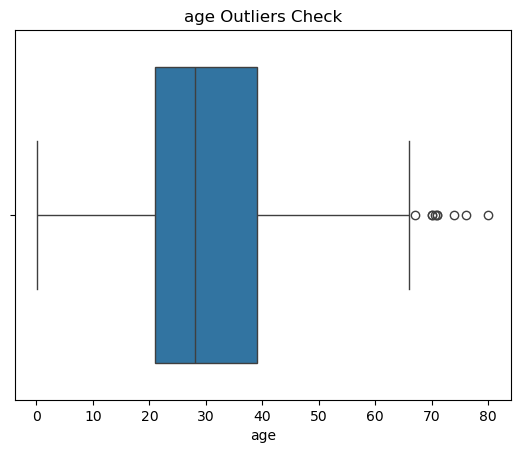

fare skewness: 4.345


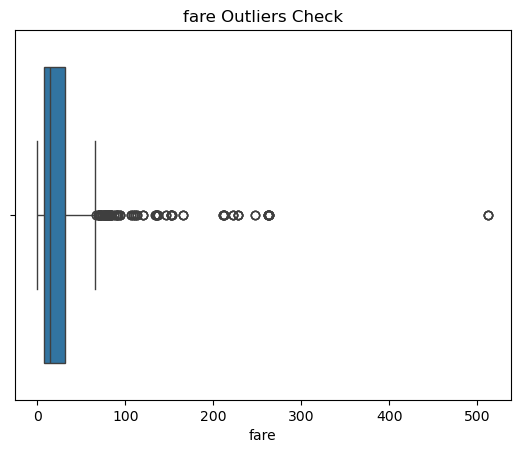

In [16]:
for col in ["age","fare"]:
    if col in df.columns:
        print(f"{col} skewness:", round(skew(df[col].dropna()), 3))
        sns.boxplot(x=df[col])
        plt.title(f"{col} Outliers Check")
        plt.show()

In [17]:
# - Females had higher survival rates than males
# - 1st class passengers survived more
# - Higher fare passengers had better survival chance
# - Many missing values in Age/Fare need handling